In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
from matplotlib import colormaps
import streamlit as st

In [2]:
jamming_1 = pd.read_csv('active-gaussian-jamming/5805mhz_jamming_10dbm_gaussiannoise_1.csv')
jamming_2 = pd.read_csv('active-gaussian-jamming/5805mhz_jamming_0dbm_gaussiannoise_28.csv')
jamming_3 = pd.read_csv('active-gaussian-jamming/5805mhz_jamming_neg10dbm_gaussiannoise_9.csv')

benign_1 = pd.read_csv('active-benign-background/5ghz_activescan_background_loc1_1.csv')
benign_2 = pd.read_csv('active-benign-background/5ghz_activescan_background_loc2_35.csv')
benign_3 = pd.read_csv('active-benign-background/5ghz_activescan_floor_32.csv')

In [3]:
benign_1

,freq1,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db
0,5805,-108,60,87,380,7,8,56
1,5805,-108,48,87,380,5,10,55
2,5805,-108,54,87,380,5,8,55
3,5805,-108,52,87,380,7,9,55
4,5805,-108,48,87,380,5,11,56
...,...,...,...,...,...,...,...,...
29995,5805,-108,71,90,377,5,10,58
29996,5805,-108,57,90,377,5,11,57
29997,5805,-108,55,90,377,3,9,57
29998,5805,-108,74,90,377,4,9,57


In [4]:
jamming_1

,freq1,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db
0,5805,-102,34,38,422,54,16,59
1,5805,-102,51,40,421,51,15,61
2,5805,-102,44,39,421,52,14,60
3,5805,-102,41,39,421,51,14,60
4,5805,-102,36,38,422,52,17,59
...,...,...,...,...,...,...,...,...
29995,5805,-102,40,37,423,53,15,58
29996,5805,-102,38,38,422,53,14,58
29997,5805,-102,40,37,424,55,15,58
29998,5805,-102,41,38,422,53,14,59


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

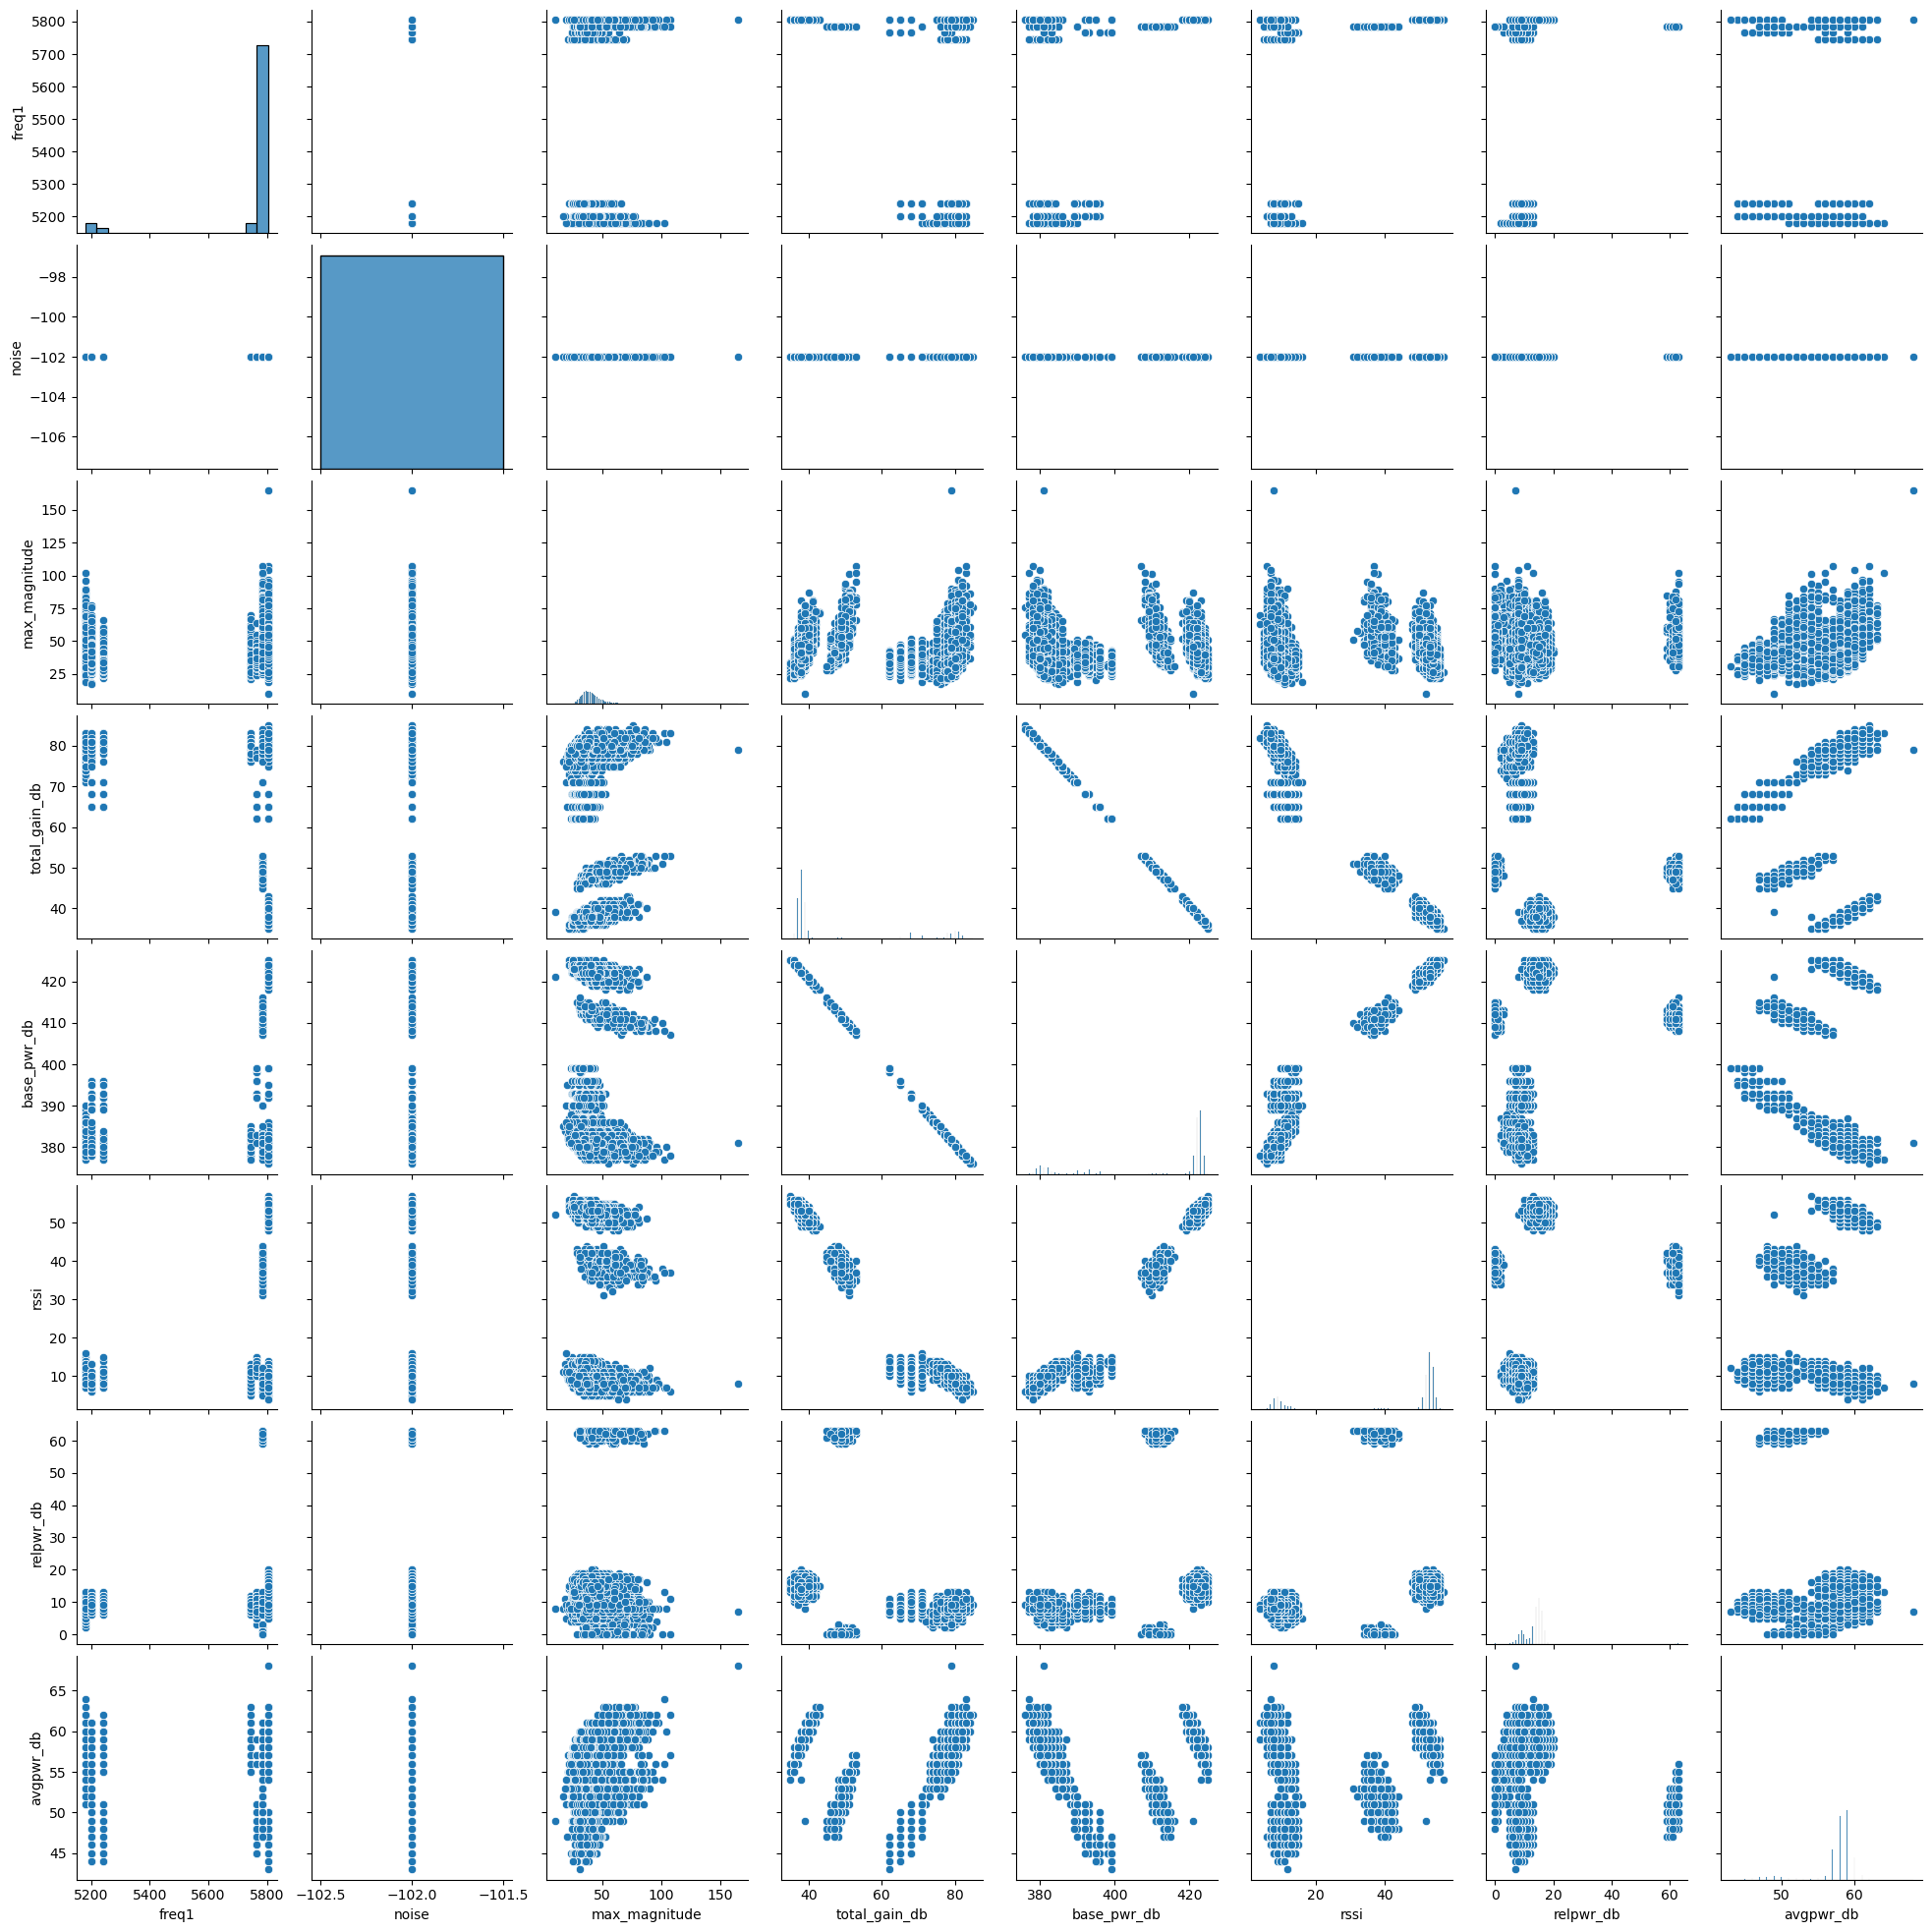

In [5]:
sns.pairplot(jamming_1)

## The below plots all look relatively the same, but lets see what happens if I remove the frequency column

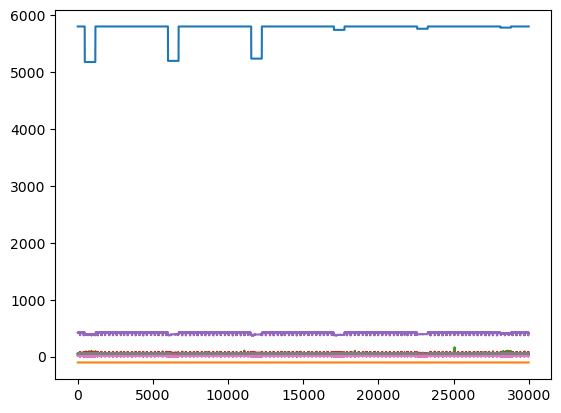

In [6]:
plt.plot(jamming_1)

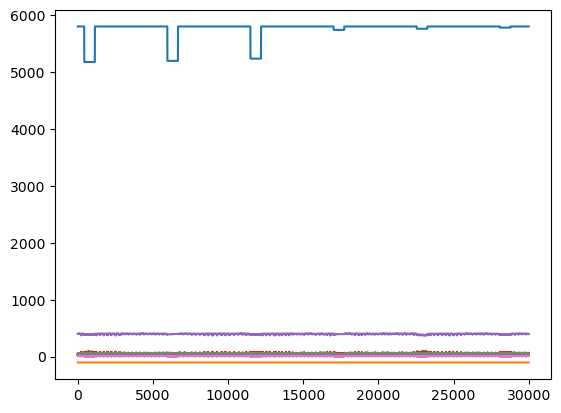

In [7]:
plt.plot(jamming_2)

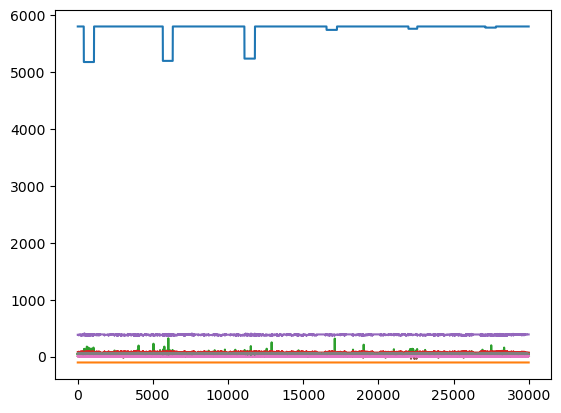

In [8]:
plt.plot(benign_2)

In [9]:
benign_1.head(5)

,freq1,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db
0,5805,-108,60,87,380,7,8,56
1,5805,-108,48,87,380,5,10,55
2,5805,-108,54,87,380,5,8,55
3,5805,-108,52,87,380,7,9,55
4,5805,-108,48,87,380,5,11,56


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

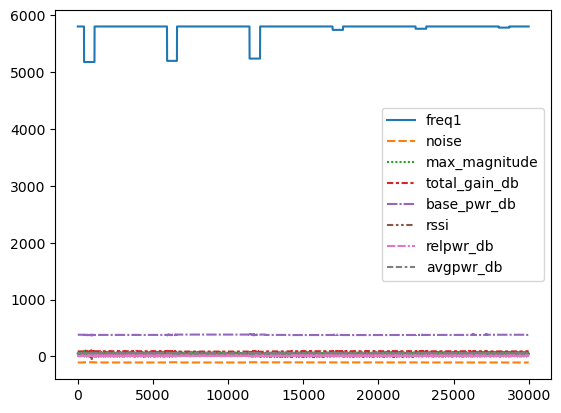

In [10]:
sns.lineplot(benign_1)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Benign example at 5.8 GHz')

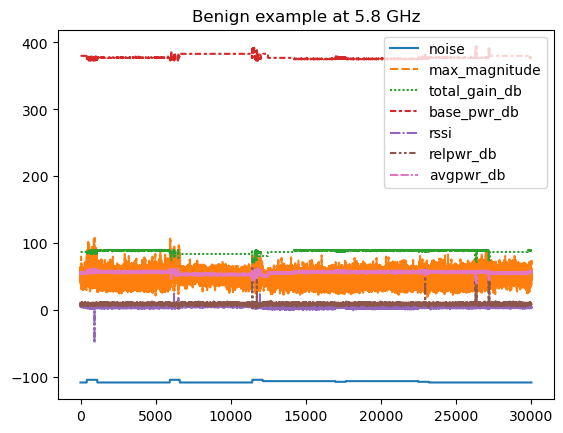

In [11]:
test = benign_1.drop('freq1', axis=1)
sns.lineplot(test)
plt.title('Benign example at 5.8 GHz')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Jamming example at 5.8 GHz')

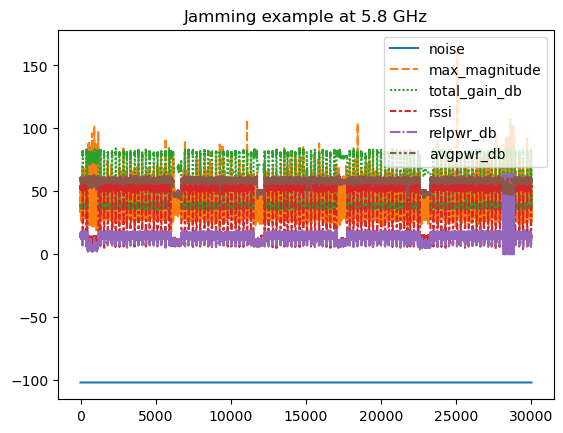

In [12]:
jamming_test = jamming_1.drop('freq1', axis=1)
jamming_test2 = jamming_test.drop('base_pwr_db', axis=1)
sns.lineplot(jamming_test2)
plt.title('Jamming example at 5.8 GHz')

## Wow! A lot more going on in the intentional jamming one. Makes sense I guess!

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Benign jamming at 5.8 GHz')

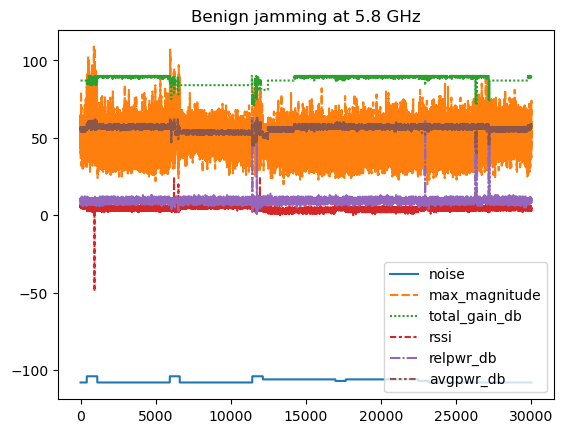

In [13]:
benign_test = benign_1.drop(['freq1', 'base_pwr_db'], axis=1)
sns.lineplot(benign_test)
plt.title('Benign jamming at 5.8 GHz')

## Much better. You can tell there is a clear difference between the benign and jamming

### Lets try to plot just the main signal and add a spectrogram

In [14]:
max_magnitude = jamming_test['max_magnitude']

In [15]:
max_magnitude_array = max_magnitude.to_numpy()

Text(0, 0.5, 'Frequency [Hz]')

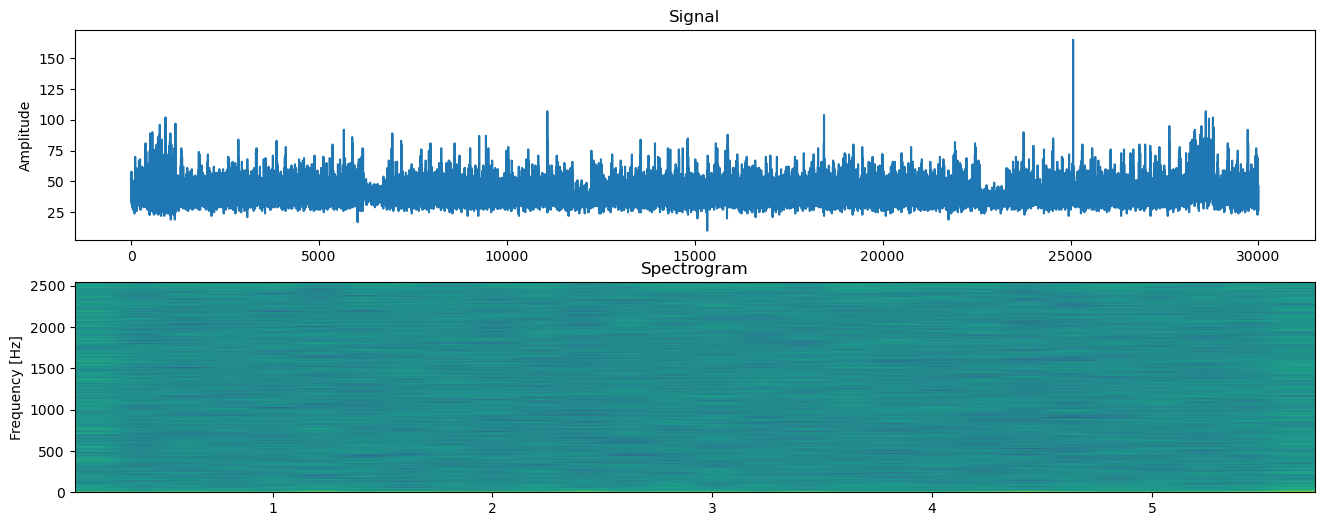

In [16]:
NFFT = 2048
dt = 0.0001967
Fs = 1/dt
sample_length = 30000
sample_ylim = 150

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,6))
ax1.plot(max_magnitude_array)
ax1.set_title('Signal')
ax1.set_ylabel('Amplitude')

Pxx, freqs, bins, im = ax2.specgram(max_magnitude_array, NFFT=NFFT, Fs=Fs, noverlap=NFFT//2)

ax2.set_title('Spectrogram')
ax2.set_ylabel('Frequency [Hz]')
# plt.xlim(0, sample_length)
# plt.ylim(0, sample_ylim)


In [17]:
max_magnitude_array

array([34, 51, 44, ..., 40, 41, 46])

Text(0, 0.5, 'Frequency (Hz)')

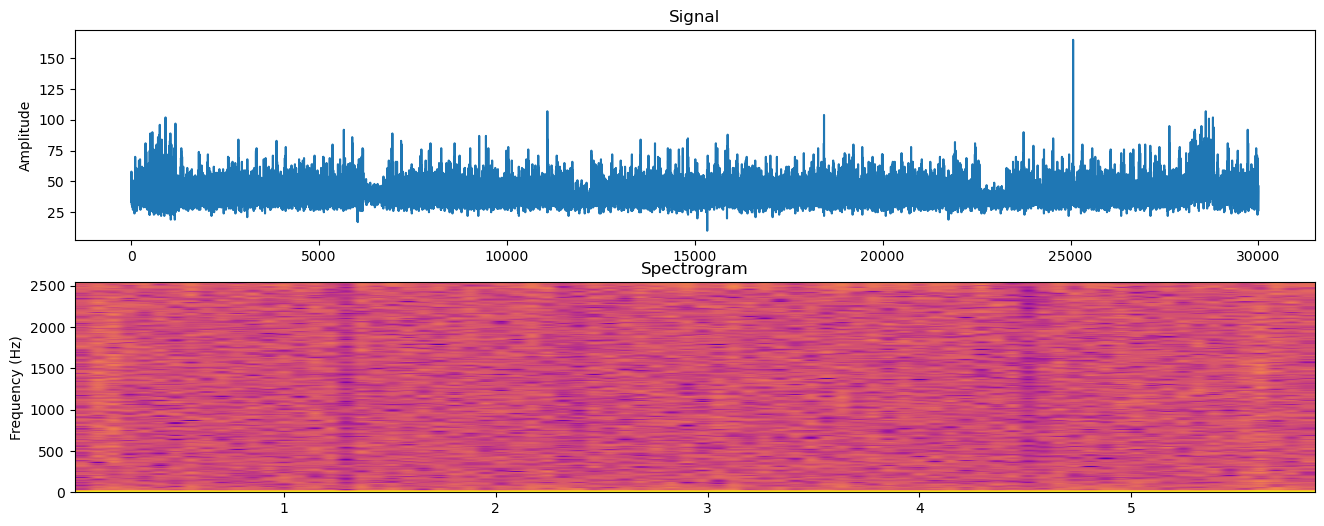

In [18]:
NFFT = 500
dt = 0.0001967
Fs = 1 / dt

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,6))
ax1.plot(max_magnitude_array)
ax1.set_title('Signal')
ax1.set_ylabel('Amplitude')

Pxx, freqs, bins, im = ax2.specgram(max_magnitude_array, NFFT=NFFT, Fs=Fs, cmap='plasma')

ax2.set_title('Spectrogram')
ax2.set_ylabel('Frequency (Hz)')

### Gonna have to come back to that

In [19]:
jamming_test

,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db
0,-102,34,38,422,54,16,59
1,-102,51,40,421,51,15,61
2,-102,44,39,421,52,14,60
3,-102,41,39,421,51,14,60
4,-102,36,38,422,52,17,59
...,...,...,...,...,...,...,...
29995,-102,40,37,423,53,15,58
29996,-102,38,38,422,53,14,58
29997,-102,40,37,424,55,15,58
29998,-102,41,38,422,53,14,59


In [20]:
benign_test

,noise,max_magnitude,total_gain_db,rssi,relpwr_db,avgpwr_db
0,-108,60,87,7,8,56
1,-108,48,87,5,10,55
2,-108,54,87,5,8,55
3,-108,52,87,7,9,55
4,-108,48,87,5,11,56
...,...,...,...,...,...,...
29995,-108,71,90,5,10,58
29996,-108,57,90,5,11,57
29997,-108,55,90,3,9,57
29998,-108,74,90,4,9,57


### Moving on to the regression model

In [21]:
jamming_test['label'] = 1
benign_test['label'] = 0

data = pd.concat([jamming_test, benign_test])
data = data.drop(['base_pwr_db'], axis=1)

In [22]:
X = data.drop(['label'], axis=1)
y = data['label']

In [23]:
data

,noise,max_magnitude,total_gain_db,rssi,relpwr_db,avgpwr_db,label
0,-102,34,38,54,16,59,1
1,-102,51,40,51,15,61,1
2,-102,44,39,52,14,60,1
3,-102,41,39,51,14,60,1
4,-102,36,38,52,17,59,1
...,...,...,...,...,...,...,...
29995,-108,71,90,5,10,58,0
29996,-108,57,90,5,11,57,0
29997,-108,55,90,3,9,57,0
29998,-108,74,90,4,9,57,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [25]:
model.predict_proba(X_test)

array([[0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.43465806e-12],
       [1.00000000e+00, 5.59269488e-12],
       ...,
       [1.74080566e-06, 9.99998259e-01],
       [8.47423276e-05, 9.99915258e-01],
       [0.00000000e+00, 1.00000000e+00]])

In [26]:
y_pred = model.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9056
           1       1.00      1.00      1.00      8944

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



In [28]:
print(confusion_matrix(y_test, y_pred))

[[9055    1]
 [   0 8944]]


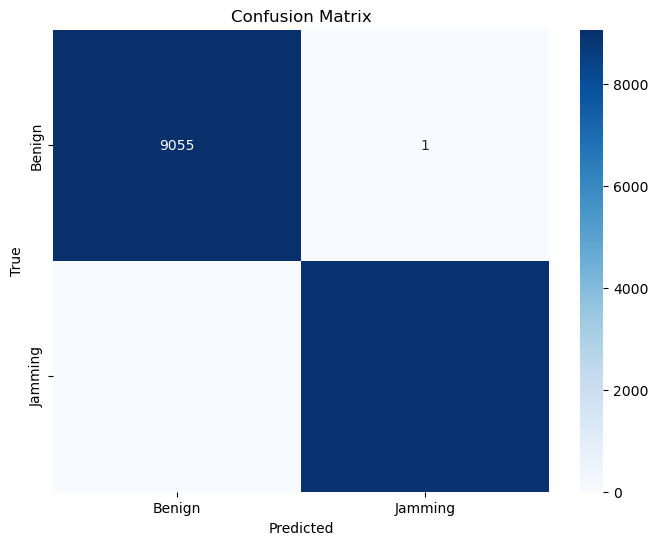

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Jamming'], yticklabels=['Benign', 'Jamming'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
model.coef_

array([[ 2.83087578, -0.08615185, -1.89905597, -0.33508958, -0.23930869,
         2.0226563 ]])

### WOW that correlates really well. Should I keep that? It's almost too good... Also missing the values below. Im going to try to test other models, and validate them

In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y)
print(scores)
print(kf)

[0.99991667 0.99958333 1.         1.         1.        ]
KFold(n_splits=5, random_state=42, shuffle=True)


In [32]:
benign = pd.concat([benign_1, benign_2, benign_3], ignore_index=True)
jamming = pd.concat([jamming_1, jamming_2, jamming_3], ignore_index=True)

In [33]:
benign['label'] = 0
jamming['label'] = 1

In [34]:
combined_data = pd.concat([benign, jamming], ignore_index=True)

In [35]:
combined_data.sample(20)

,freq1,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db,label
114636,5805,-102,37,37,424,54,14,58,1
127126,5805,-102,47,60,401,28,14,59,1
14030,5805,-106,36,87,377,3,10,55,0
57482,5785,-102,62,85,376,11,10,61,0
3783,5805,-108,37,90,377,5,10,57,0
142200,5805,-102,41,59,401,27,17,58,1
52947,5805,-102,41,75,386,11,10,52,0
59796,5805,-103,54,71,391,9,11,48,0
108846,5805,-102,43,38,422,53,13,58,1
27884,5805,-108,65,87,380,6,9,55,0


In [36]:
active_X = combined_data.drop(['label'], axis=1)
active_y = combined_data['label']

In [37]:
X_train_active, X_test_active, y_train_active, y_test_active = train_test_split(active_X, active_y, test_size=0.3, random_state=42)

active_model = LogisticRegression(max_iter=2000, random_state=42)
active_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [38]:
combined_y_pred = active_model.predict(X_test)

In [39]:
y_test_active

123137    1
130504    1
31166     0
26262     0
64868     0
         ..
58158     0
37377     0
176352    1
132675    1
144202    1
Name: label, Length: 54000, dtype: int64

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
accuracy_active = accuracy_score(y_test_active, combined_y_pred)
precision_active = precision_score(y_test_active, combined_y_pred)
recall_active = recall_score(y_test_active, combined_y_pred)
f1_active = f1_score(y_test_active, combined_y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [54000, 18000]

In [ ]:
print(f"Active Accuracy: {accuracy_active: }")
print(f"Active Precision: {precision_active: }")
print(f"Active Recall: {recall_active: }")
print(f"Active F1 Score: {f1_active: }")

NameError: name 'accuracy_active' is not defined

In [ ]:
active_metrics = {
    'accuracy': accuracy_active,
    'precision': precision_active,
    'recall': recall_active,
    'f1': f1_active
}